In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize


In [5]:
# Load the dataset
file_path = './cars_data_10_cleaning.csv'
cars_data = pd.read_csv(file_path)
cars_data.head()


,accelerationTime,bodyType,brand,cargoVolume,curbWeight,driveWheelConfiguration,eLabel,emissionsCO2,engineCapacity,fuelCapacity,...,seatingCapacity,speed,torque,vEengineDisplacement,vEenginePower,vEengineType,vehicleTransmission,weightTotal,wheelbase,width
0,11.2,"4-doors, sedan",Hyundai,376.0,1068.0,front,g,174.0,1495.0,55.0,...,5.0,178.0,129.0,1495.0,65.0,fuel engine,Manual transmission,1650.0,2550.0,1700.0
1,13.6,"4-doors, sedan",Hyundai,376.0,1093.0,front,g,210.0,1495.0,55.0,...,5.0,166.0,129.0,1495.0,65.0,fuel engine,Automatic,1650.0,2550.0,1700.0
2,8.8,"4-doors, sedan",Hyundai,376.0,1126.0,front,g,196.0,1976.0,55.0,...,5.0,202.0,182.0,1976.0,102.0,fuel engine,Manual transmission,1685.0,2550.0,1700.0
3,11.1,"4-doors, sedan",Hyundai,376.0,1156.0,front,g,229.0,1976.0,55.0,...,5.0,187.0,182.0,1976.0,102.0,fuel engine,Automatic,1685.0,2550.0,1700.0
4,10.5,"4-doors, sedan",Hyundai,376.0,1085.0,front,g,184.0,1599.0,55.0,...,5.0,193.0,143.0,1599.0,84.0,fuel engine,Manual transmission,1685.0,2550.0,1700.0


In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27400 entries, 0 to 27399
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         27400 non-null  float64
 1   bodyType                 27400 non-null  object 
 2   brand                    27400 non-null  object 
 3   cargoVolume              27400 non-null  float64
 4   curbWeight               27400 non-null  float64
 5   driveWheelConfiguration  27400 non-null  object 
 6   eLabel                   27400 non-null  object 
 7   emissionsCO2             27400 non-null  float64
 8   engineCapacity           27400 non-null  float64
 9   fuelCapacity             27400 non-null  float64
 10  fuelConsumption          27400 non-null  float64
 11  fuelType                 27400 non-null  object 
 12  height                   27400 non-null  float64
 13  length                   27400 non-null  float64
 14  model                 

In [3]:
# Descriptive statistics of the dataset
descriptive_stats = cars_data.describe()

# Checking for missing values
missing_values = cars_data.isnull().sum()

# Checking for duplicates
duplicate_rows = cars_data.duplicated().sum()

descriptive_stats, missing_values, duplicate_rows


(       accelerationTime   cargoVolume    curbWeight  emissionsCO2  \
 count      27400.000000  27400.000000  27400.000000  27400.000000   
 mean          10.222332   1233.981241   1381.420730    163.083577   
 std            2.665840    721.375991    266.262153     46.467832   
 min            3.300000     90.000000    625.000000     14.000000   
 25%            8.400000    808.000000   1208.000000    128.000000   
 50%           10.200000   1220.000000   1370.000000    156.000000   
 75%           11.800000   1525.000000   1530.000000    190.000000   
 max           21.900000   8400.000000   2921.000000    400.000000   
 
        engineCapacity  fuelCapacity  fuelConsumption        height  \
 count    27400.000000  27400.000000     27400.000000  27400.000000   
 mean      1954.984745     58.866533         6.760124   1503.565584   
 std        655.561289     10.888629         6.324398    118.101722   
 min        658.000000     10.000000         0.900000   1225.000000   
 25%       15

In [4]:
# Removing duplicate rows
cars_data_cleaned = cars_data.drop_duplicates()

# Verifying the removal of duplicates
remaining_duplicates = cars_data_cleaned.duplicated().sum()

# Number of rows after removing duplicates
remaining_rows = cars_data_cleaned.shape[0]

remaining_duplicates, remaining_rows


(0, 26671)

In [7]:
# Correlation analysis
correlation_matrix = cars_data_cleaned.corr()

# Display the correlation matrix focusing on 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_price


ValueError: could not convert string to float: '4-doors, sedan'

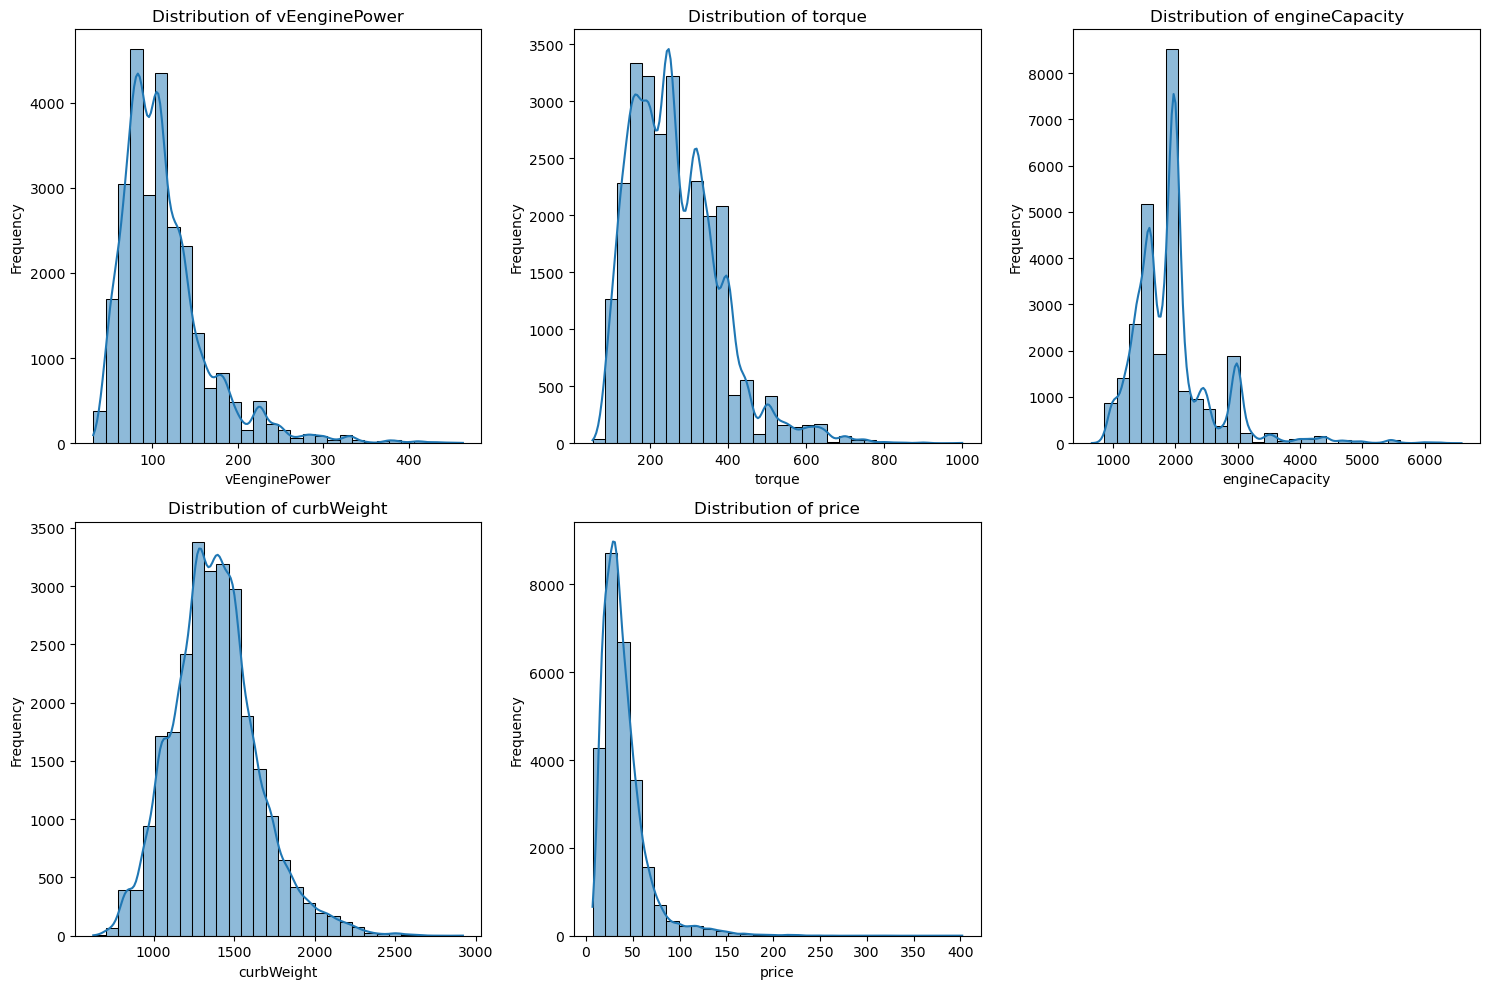

In [8]:
# List of features to plot
features_to_plot = ['vEenginePower', 'torque', 'engineCapacity', 'curbWeight', 'price']

# Creating histograms for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cars_data_cleaned[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


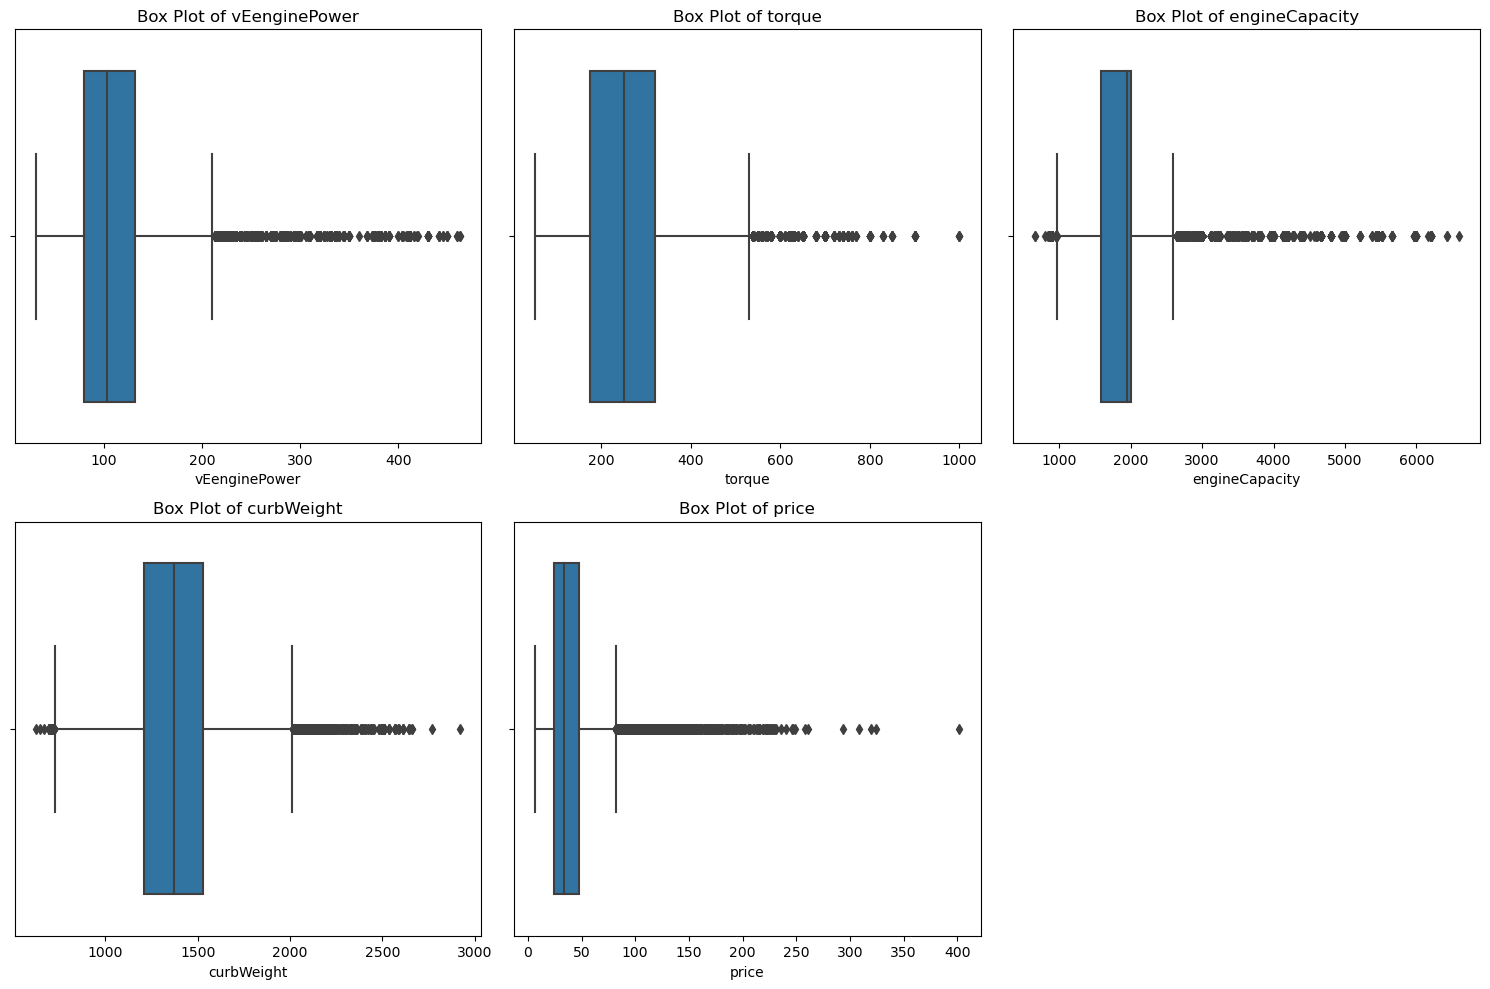

In [9]:
# Creating box plots for each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=cars_data_cleaned[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


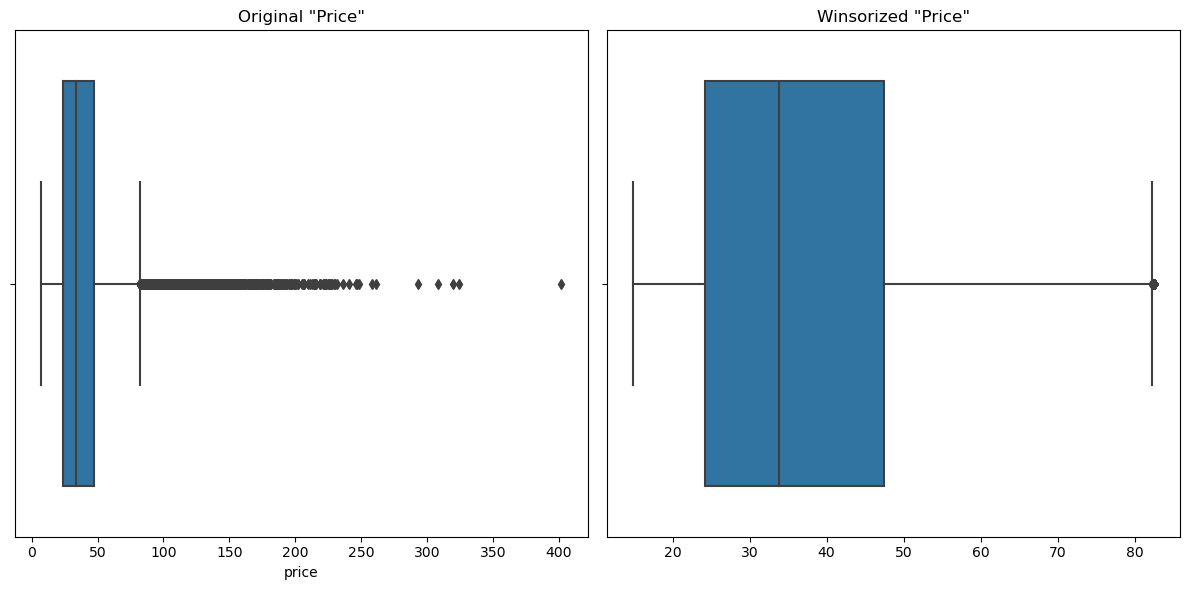

In [10]:
# Winsorizing the 'price' feature
# Setting the limits to the 5th and 95th percentiles
winsorized_price = winsorize(cars_data_cleaned['price'], limits=[0.05, 0.05])

# Creating box plots to compare before and after winsorizing
plt.figure(figsize=(12, 6))

# Box plot before winsorizing
plt.subplot(1, 2, 1)
sns.boxplot(x=cars_data_cleaned['price'])
plt.title('Original "Price"')

# Box plot after winsorizing
plt.subplot(1, 2, 2)
sns.boxplot(x=winsorized_price)
plt.title('Winsorized "Price"')

plt.tight_layout()
plt.show()


In [11]:
cars_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26671 entries, 0 to 27399
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26671 non-null  float64
 1   bodyType                 26671 non-null  object 
 2   brand                    26671 non-null  object 
 3   cargoVolume              26671 non-null  float64
 4   curbWeight               26671 non-null  float64
 5   driveWheelConfiguration  26671 non-null  object 
 6   eLabel                   26671 non-null  object 
 7   emissionsCO2             26671 non-null  float64
 8   engineCapacity           26671 non-null  float64
 9   fuelCapacity             26671 non-null  float64
 10  fuelConsumption          26671 non-null  float64
 11  fuelType                 26671 non-null  object 
 12  height                   26671 non-null  float64
 13  length                   26671 non-null  float64
 14  model                    26